In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn-v0_8-whitegrid')

plt.set_cmap('Accent')
from dotenv import load_dotenv
load_dotenv()

cleaned_path = os.getenv('CLEANED_PATH')
raw_path = os.getenv('RAW_PATH')

<Figure size 640x480 with 0 Axes>

In [21]:
def summary_data(df):
    print(f'Dataframe có tất cả: {df.shape[0]} hàng và {df.shape[1]} cột\n\n')
    print(f'Kiểu dữ liệu:\n\n{df.dtypes} \n\n')
    print(f'Missing values:\n\n{df.isnull().sum()} \n\n')
    print('Duplicated rows:', df.duplicated().sum())


In [22]:
df_products_raw = pd.read_csv(raw_path+'fahasha_products.csv')

In [23]:
df_products_cleaned = pd.read_csv(cleaned_path+'products_cleaned.csv')

In [24]:
summary_data(df_products_cleaned)

Dataframe có tất cả: 1691 hàng và 14 cột


Kiểu dữ liệu:

Mã sản phẩm                object
Tên sản phẩm               object
Giá                         int64
Giá Thị Trường              int64
Số sản phẩm đã bán          int64
Nhà xuất bản               object
Tác giả                    object
Số trang                   object
Đánh Giá trung bình       float64
Số lượt đánh giá            int64
Tên danh mục c1            object
Tên danh mục c2            object
Loại doanh số sản phẩm      int64
Phần trăm giảm            float64
dtype: object 


Missing values:

Mã sản phẩm                0
Tên sản phẩm               0
Giá                        0
Giá Thị Trường             0
Số sản phẩm đã bán         0
Nhà xuất bản               6
Tác giả                   10
Số trang                  76
Đánh Giá trung bình        0
Số lượt đánh giá           0
Tên danh mục c1            0
Tên danh mục c2            0
Loại doanh số sản phẩm     0
Phần trăm giảm             0
dtype: int64 


Duplicated

Ý tưởng cho quá trình phân tích dữ liệu khám phá (EDA) bao gồm:

1. Xác định số lượng sách còn lại sau khi xử lý dữ liệu.
2. Tìm hiểu thể loại sách bán chạy nhất và số lượng sách bán ra của từng thể loại.
3. Thống kê số lượng sách của từng thể loại.
4. Thống kê giá sách của từng thể loại.
5. Vẽ biểu đồ miền giá để xem mức giá theo từng thể loại
6. Tính lãi suất mà từng thể loại sách thu được dựa trên giá mới và giá cũ.
7. Phân tích từng thể loại được viết bởi những tác giả nào

In [25]:
# 1. Xác định số lượng sách còn lại sau khi xử lý dữ liệu.

print(f'Số lượng sản phẩm còn lại sau khi xử lý dữ liệu: {df_products_cleaned.shape[0]}')
print(f'Số lượng sản phẩm bị loại bỏ: {df_products_raw.shape[0] - df_products_cleaned.shape[0]}')

Số lượng sản phẩm còn lại sau khi xử lý dữ liệu: 1691
Số lượng sản phẩm bị loại bỏ: 81


Feature Engineering

In [26]:
df_products_cleaned['Doanh số tương đối'] = df_products_cleaned['Giá'] * df_products_cleaned['Số sản phẩm đã bán']
df_products_cleaned['Doanh số giá thị trường'] = df_products_cleaned['Giá Thị Trường'] * df_products_cleaned['Số sản phẩm đã bán']



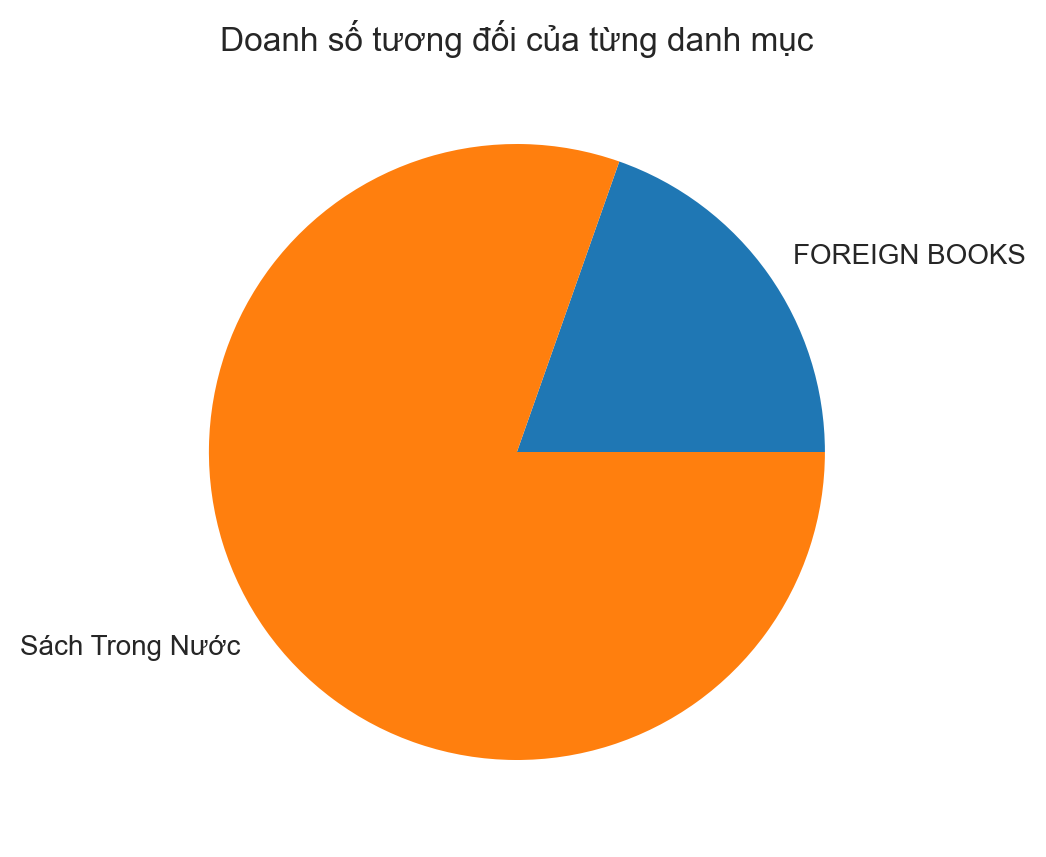

In [48]:
#2. Tìm hiểu thể loại sách bán chạy nhất và số lượng sách bán ra của từng thể loại.
df_products_cleaned.groupby('Tên danh mục c1')['Doanh số tương đối'].sum().sort_values(ascending=True).plot(kind='pie', figsize=(10, 5))
plt.title('Doanh số tương đối của từng danh mục')
plt.ylabel('')

plt.show()

In [28]:
df_products_cleaned.groupby('Tên danh mục c1')['Doanh số tương đối'].sum().sort_values(ascending=True)

Tên danh mục c1
FOREIGN BOOKS      211296381700
Sách Trong Nước    866379604500
Name: Doanh số tương đối, dtype: int64

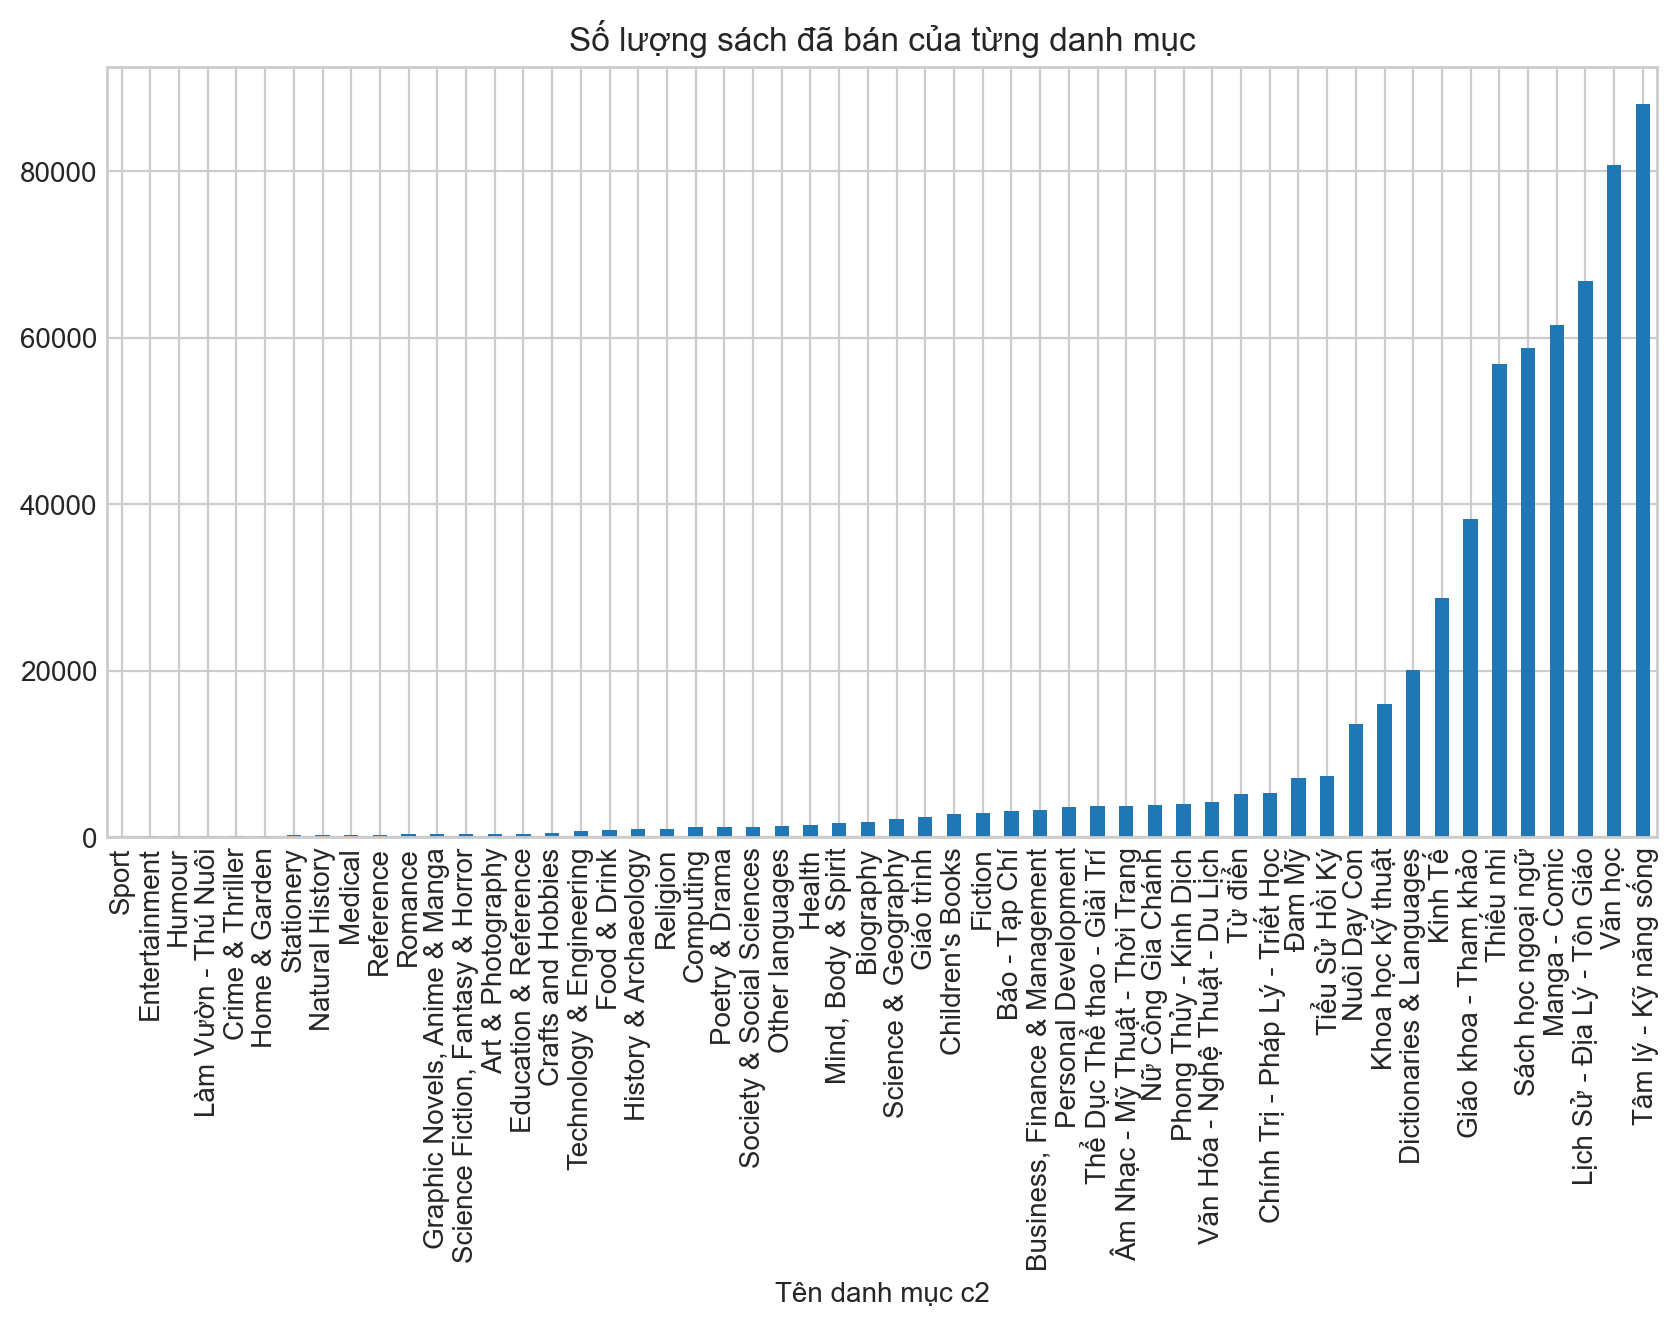

In [31]:
#số lượng sách bán ra của từng thể loại.
plt.figure(figsize=(15, 20))
df_products_cleaned.groupby('Tên danh mục c2')['Số sản phẩm đã bán'].sum().sort_values(ascending=True).plot(kind='bar', figsize=(10, 5))
plt.title('Số lượng sách đã bán của từng danh mục')
plt.show()

In [34]:
df_products_cleaned.groupby('Tên danh mục c2')['Số sản phẩm đã bán'].sum().sort_values(ascending=True)

Tên danh mục c2
Sport                                   51
Entertainment                          102
Humour                                 117
Làm Vườn - Thú Nuôi                    129
Crime & Thriller                       146
Home & Garden                          162
Stationery                             218
Natural History                        262
Medical                                282
Reference                              295
Romance                                314
Graphic Novels, Anime & Manga          316
Science Fiction, Fantasy & Horror      323
Art & Photography                      342
Education & Reference                  359
Crafts and Hobbies                     515
Technology & Engineering               772
Food & Drink                           903
History & Archaeology                  915
Religion                              1022
Computing                             1184
Poetry & Drama                        1245
Society & Social Sciences             

---

<Axes: xlabel='Tên danh mục c2'>

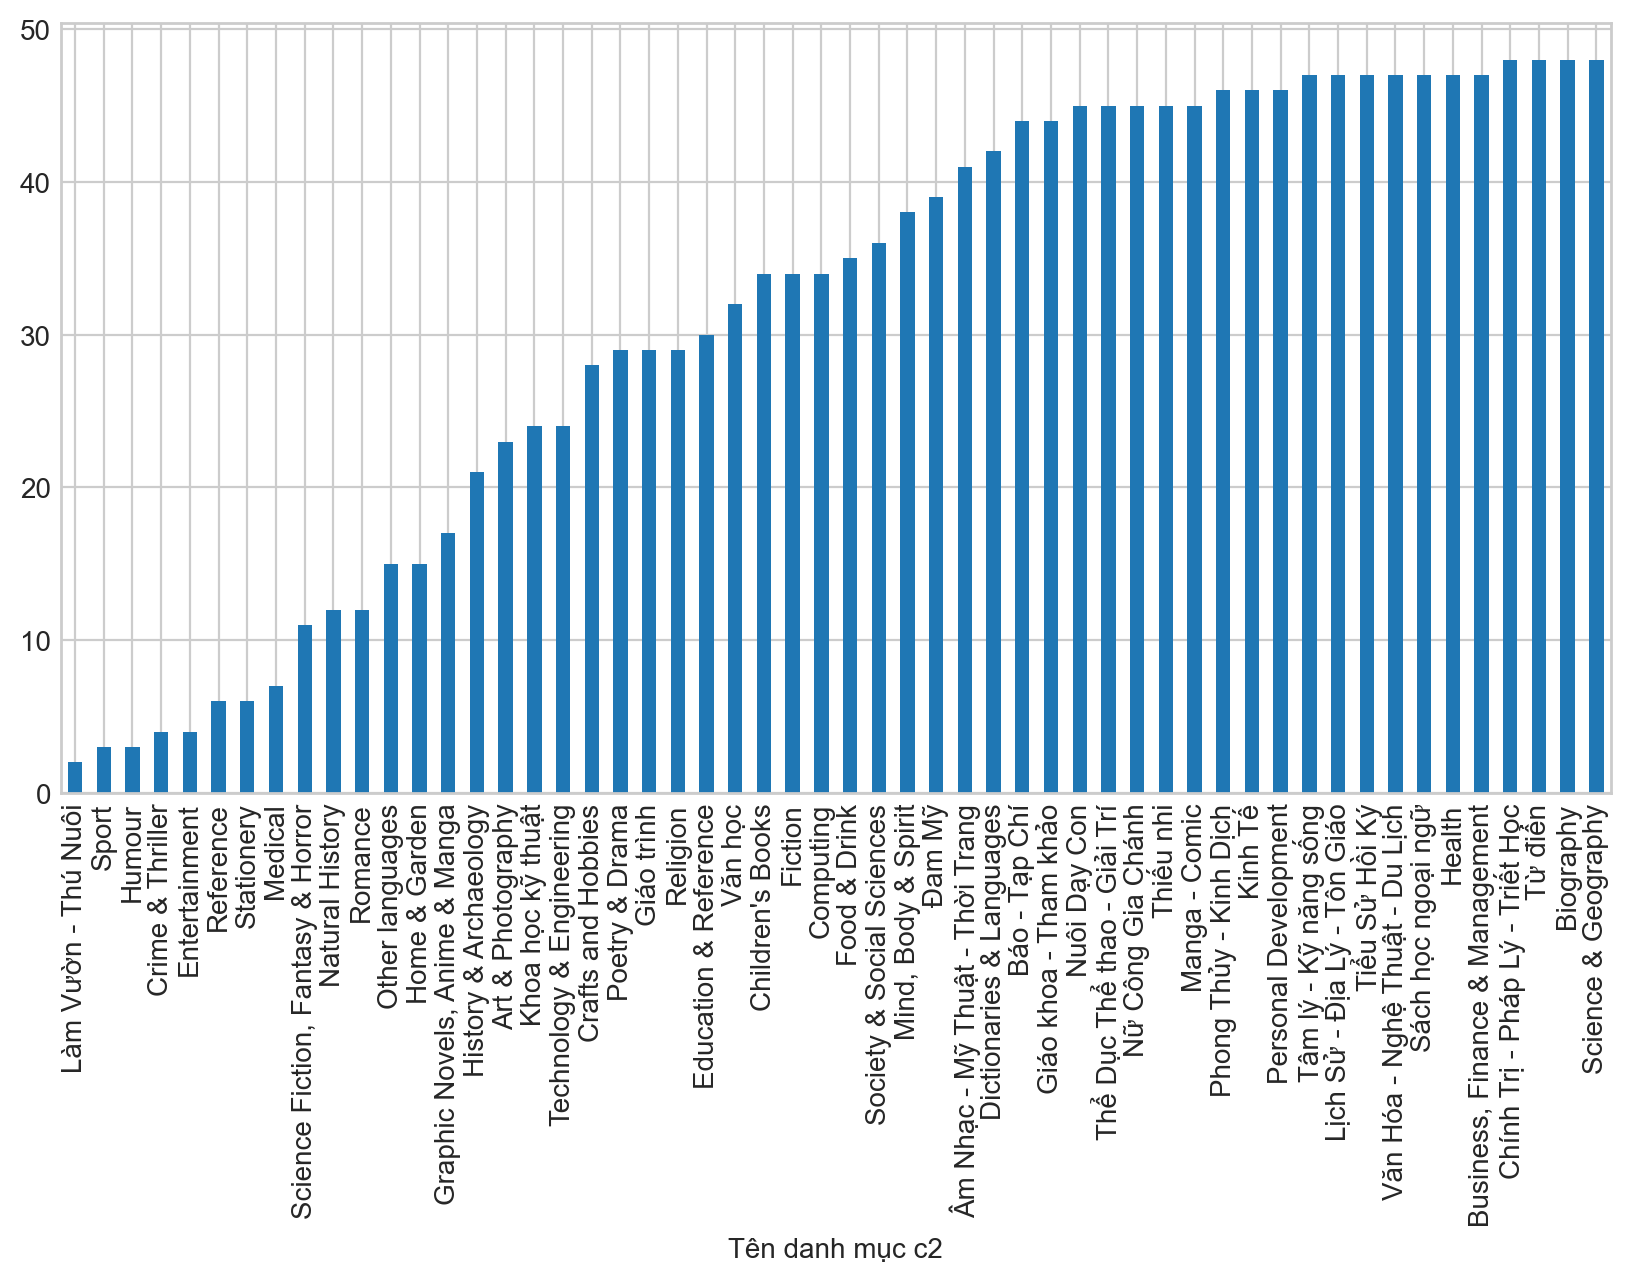

In [35]:
#3. Thống kê số lượng sách của từng thể loại.
df_products_cleaned['Tên danh mục c2'].value_counts(ascending=True).plot(kind='bar', figsize=(10, 5))

---

In [37]:
#4. Thống kê giá sách của từng thể loại.
df_products_cleaned.groupby('Tên danh mục c2')['Giá'].agg([ 'min' , 'max' , 'mean', 'median' , 'std' ])

,min,max,mean,median,std
Tên danh mục c2,,,,,
Art & Photography,16380000,136800000,5.046696e+07,41220000.0,2.704073e+07
Biography,130500,4360500,4.128562e+05,307800.0,5.952051e+05
"Business, Finance & Management",161100,681300,3.252596e+05,319500.0,1.026156e+05
Báo - Tạp Chí,19000,1267500,1.149273e+05,19000.0,2.626442e+05
Children's Books,98100,1947500,3.084029e+05,179100.0,3.876198e+05
Chính Trị - Pháp Lý - Triết Học,25500,4162500,3.619792e+05,87200.0,8.091131e+05
Computing,19980000,168660000,4.594500e+07,37440000.0,2.573488e+07
Crafts and Hobbies,51300,542700,2.722321e+05,316800.0,1.220518e+05
Crime & Thriller,181800,25465300,6.517750e+06,211950.0,1.263171e+07


---

---

---

In [42]:
dict_author = {'Tên danh mục': [], 'Tác giả': []}
for i in df_products_cleaned['Tên danh mục c2'].unique():
    dict_author['Tên danh mục'].append(i)
    dict_author['Tác giả'].append(str(set(df_products_cleaned[df_products_cleaned['Tên danh mục c2'] == i]['Tác giả'].values)))

In [43]:
df_author_by_cate = pd.DataFrame(dict_author)

In [44]:
df_author_by_cate

,Tên danh mục,Tác giả
0,Thiếu nhi,"{'Hà Yên', 'Tiểu Mạch Đông Thái', 'Yunan', 'Ph..."
1,Giáo khoa - Tham khảo,"{'Vũ Mỹ Lan, Huỳnh Đông Hải, Nguyễn Thủy Liên,..."
2,Văn học,"{'Múc', 'Emma Hạ My', 'Madeline Miller', 'Lưu ..."
3,Tâm lý - Kỹ năng sống,"{'Trác Nhã', 'Phan Văn Trường', 'Mihaly Csiksz..."
4,Manga - Comic,"{'Akira Toriyama, Toyotarou', 'Saekisan, Hanek..."
5,Sách học ngoại ngữ,"{'Malcome Mann, Steve Taylore-Knowles', 'Nguyễ..."
6,Kinh Tế,"{'Chu Vân', 'Phan Văn Trường', 'Avinash K. Dix..."
7,Lịch Sử - Địa Lý - Tôn Giáo,"{'Nguyên Phong', 'Nguyên Phong, Thích Nhất Hạn..."
8,Khoa học kỹ thuật,"{'Anthony William', 'Jessie Inchauspé', 'Arnol..."
9,Nuôi Dạy Con,"{'Nguyễn Trí Đoàn, Uyên Bùi', 'Alicia Vu', 'Sh..."
